# 딥러닝 기본 모델 구동 확인

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [3]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6640 - accuracy: 0.8346
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3449 - accuracy: 0.9045
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2965 - accuracy: 0.9165s - los
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2671 - accuracy: 0.9251
Epoch 5/5
10000/10000 [==============================] - 0s 38us/sample - loss: 0.2283 - accuracy: 0.9366
loss_and_metrics : [0.22825046445429326, 0.9366]


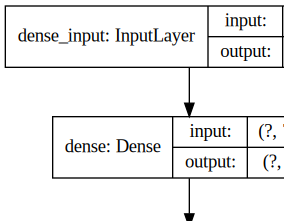

In [7]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')